In [11]:
!pip -q install networkx 
!pip -q install matplotlib

In [64]:
%matplotlib inline
import networkx as nx 
import random 
import matplotlib.pyplot as plt 

In [3]:
develop_data = "/Users/zyang/Documents/VSCode/DeepSpin/develop.data"
with open(develop_data, 'r') as fin: 
    lines = fin.readlines()


G = nx.Graph()
for line in lines: 
    node1, node2, _ = line.split('\t')
    G.add_edge(node1, node2)

In [2]:
import csv 
develop_data = "/Users/zyang/Documents/VSCode/DeepSpin/develop.data"
with open(develop_data, 'r') as fin: 
    lines = fin.readlines()

fout1 = open('/Users/zyang/Documents/VSCode/DeepSpin/develop_trump.csv', 'w')
writer1 = csv.writer(fout1)
writer1.writerow(['query_1', 'query_2', 'line'])

fout2 = open('/Users/zyang/Documents/VSCode/DeepSpin/develop_longer.csv', 'w')
writer2 = csv.writer(fout2)
writer2.writerow(['query_1', 'query_2', 'rest', 'line'])

fout3 = open('/Users/zyang/Documents/VSCode/DeepSpin/develop_nodevelop.csv', 'w')
writer3 = csv.writer(fout3)
writer3.writerow(['query_1', 'query_2', 'rest', 'line'])

for line in lines: 

    node1, node2, rest = line.split('\t')
    if 'develop' not in line: 
        writer3.writerow([node1, node2, rest, line])
    if len(line.split('\t')) != 3:
        writer2.writerow([node1, node2, rest, line])
    if 'trump' in node1 or 'trump' in node2: 
        writer1.writerow([node1, node2, line])

fout1.close()
fout2.close()
fout3.close()


In [32]:
print("number of queries: ", 2*len(lines))
print("\nnumber of nodes: ", G.number_of_nodes())
print("\nnumber of edges: ", G.number_of_edges())
print("\nedges/nodes: ", 2*G.number_of_edges()/G.number_of_nodes())

number of queries:  14708502

number of nodes:  6716354

number of edges:  6368120

edges/nodes:  1.8963026665955964


In [35]:
# analyze graph 
components_list = list(nx.connected_components(G))
degree_lst = [d for n, d in G.degree()]
print("number of connected components" ,len(components_list))

print("\ntop 20 degrees: ", sorted(degree_lst)[-20:])

number of connected components 1160645

top 20 degrees:  [432, 436, 450, 453, 465, 475, 478, 480, 483, 561, 578, 609, 611, 615, 622, 625, 663, 668, 708, 1061]


In [51]:
# sorted(degree_lst, key=lambda x: x[1])[-20:]
g_dict = {n:d for n, d in G.degree()}
nodes = {n: d for n, d in sorted(g_dict.items(), key=lambda item: item[1])[-20:]}
nodes


{'social': 432,
 'art': 436,
 'solutions': 450,
 'data': 453,
 'shop': 465,
 'design': 475,
 'the': 478,
 'my': 480,
 'cloud': 483,
 'life': 561,
 'drone': 578,
 'marketing': 609,
 'impeach trump': 611,
 'travel': 615,
 'dump trump': 622,
 'home': 625,
 'fake news': 663,
 'tech': 668,
 'real_estate': 708,
 'trump': 1061}

In [43]:
# a distribution of degrees 
fig, ax = plt.subplots(1, 1, figsize=(10,8), dpi=100)

ax.hist(degree_lst, alpha=0.5, bins=100)
# ax.set_xlim(0, 100)
ax.set_ylim(0, 5000)
plt.savefig("/Users/zyang/Documents/VSCode/DeepSpin/degree_dist_2.jpg")
# plt.show()

In [54]:
# get degree and neighbours

def get_random_query(): 
    random_index = random.randint(0, len(lines)-1)
    random_line = lines[random_index]
    return random_line.split('\t')[0]

# make_up mommy
rand_query = get_random_query()
print(f"{rand_query} has direct neighbours: ", list(G.adj[rand_query]))
print(f"\n{rand_query}'s degree: ", G.degree[rand_query])

new realty media has direct neighbours:  ['new real_estate media', 'new business media', 'business media group']

new realty media's degree:  3


In [55]:
# visualize a components 

def get_component(components, query): 
    for component in components: 
        if query in component: 
            return list(component) 
    raise Exception(f"{query} not in graph")


target_nodes = get_component(components_list, rand_query)
print("number of nodes in this component: ", len(target_nodes))
if len(target_nodes) < 10:
    nx.draw_shell(G.subgraph(target_nodes))


number of nodes in this component:  3099338


In [56]:
print(target_nodes[:10])

['tag insurance', 'hatfield and mccoy', 'heartland family enterprises', 'fresh - egg z', 'wild about cats', 'hq gifts', 'fearless athletics', 'blog rus', 'eco playa products', 'ideal healthy life_style r']


number of small components,  1134537

component nodes:  {'win camaro s', 'win the camaro', 'win a camaro'}


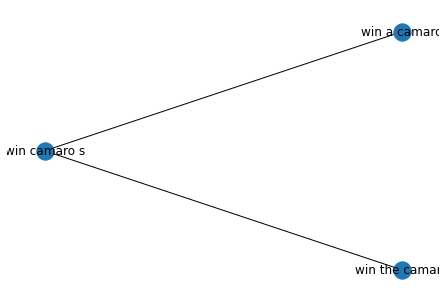

In [68]:
# visualize small components 

small_components = [component for component in components_list if len(component)<10]
print("number of small components, ", len(small_components))

rand_index = random.randint(0, len(small_components)-1)
target_component = small_components[rand_index]

print('\ncomponent nodes: ', target_component)
nx.draw_shell(G.subgraph(target_component), with_labels=True)
plt.show()

In [ ]:
# directed graph, realty -> realty agent , 
# weight, some writing are more popular than others 
# update graph near real-time, trending query, 20qps
# build edge based on pseudo edge, substring